In [5]:
# Display the loaded image in a window
cv2.imshow('Loaded Image', image)

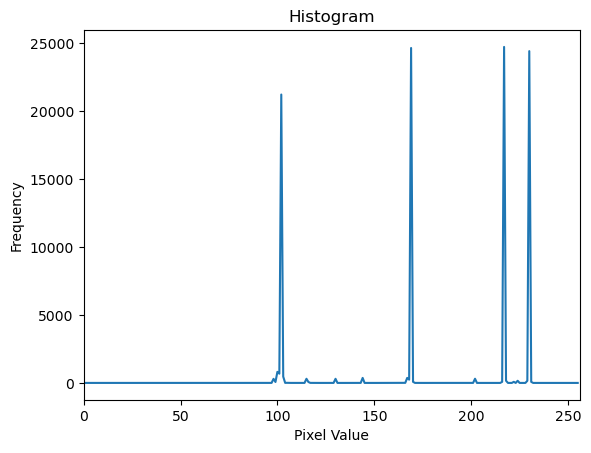

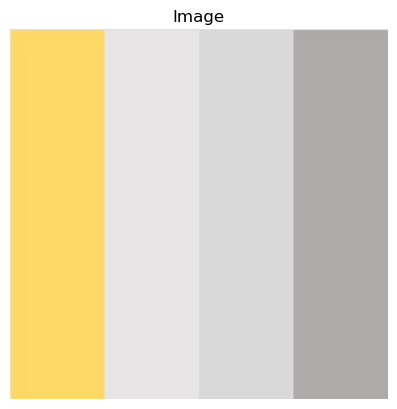

In [6]:
import matplotlib.pyplot as plt
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
# Plot the histogram
plt.figure()
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(histogram)
plt.xlim([0, 256])

# Show the image
plt.figure()
plt.title("Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display both the image and the histogram
plt.show()

In [8]:
height, width, channels = image.shape

print(f"Image width (columns): {width} pixels")
print(f"Image height (rows): {height} pixels")
print(f"Number of channels: {channels}")

Image width (columns): 320 pixels
Image height (rows): 313 pixels
Number of channels: 3


In [ ]:
import pandas as pd
import numpy as np
 # Convert the histogram to a table (DataFrame)
pixel_values = np.arange(256)  # Pixel values from 0 to 255
frequency = histogram.flatten().astype(int)  # Flatten and convert to integers

# Create a DataFrame
df = pd.DataFrame({'Pixel Value': pixel_values, 'Frequency': frequency})

 # Temporarily set Pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display the table
print(df)

# Reset Pandas option to its default setting
pd.reset_option('display.max_rows')

### Install Libraries

In [ ]:
# Install OpenCV
%pip install opencv-python

### Import Libraries

In [13]:
# Import openCV
import cv2


import matplotlib.pyplot as plt

import numpy as np

from scipy.signal import find_peaks


### Question 1

In [2]:
image = cv2.imread('Data/rect1.jpg')

height, width,channels= image.shape

print(f"Image width (columns): {width} pixels")
print(f"Image height (rows): {height} pixels")
print(f"Number of channels: {channels}")

Image width (columns): 379 pixels
Image height (rows): 277 pixels
Number of channels: 3


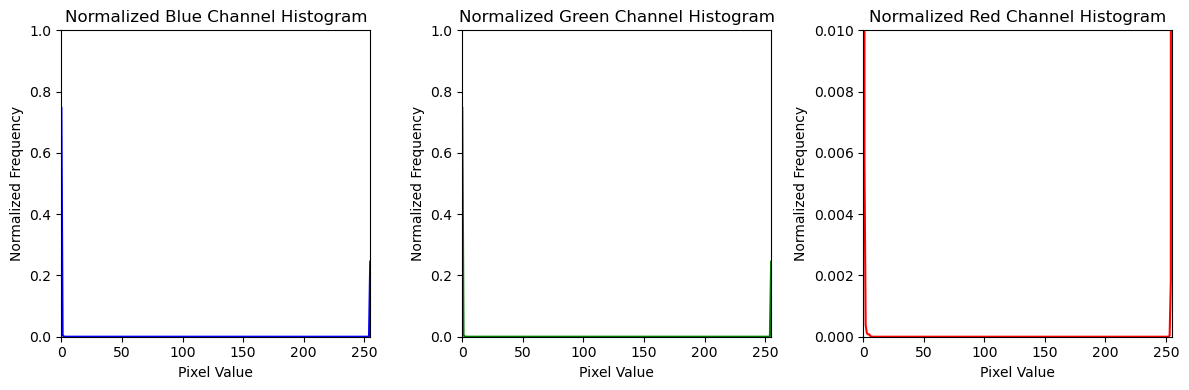

In [3]:
blue_channel = image[:, :, 0]  # Blue channel is the first channel (0-indexed)
green_channel = image[:, :, 1]  # Green channel is the second channel
red_channel = image[:, :, 2]  # Red channel is the third channel


# Calculate histograms for each channel
blue_histogram = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
green_histogram = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([red_channel], [0], None, [256], [0, 256])

# Normalize the histograms
blue_histogram /= blue_channel.size
green_histogram /= green_channel.size
red_histogram /= red_channel.size

# Create subplots for each channel's histogram
plt.figure(figsize=(12, 4))

plt.subplot(131)  # Subplot for blue channel histogram
plt.plot(blue_histogram, color='blue')
plt.title('Normalized Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.ylim([0, 1])

plt.subplot(132)  # Subplot for green channel histogram
plt.plot(green_histogram, color='green')
plt.title('Normalized Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.ylim([0, 1])

plt.subplot(133)  # Subplot for red channel histogram
plt.plot(red_histogram, color='red')
plt.title('Normalized Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.ylim([0, 0.01])

plt.tight_layout()
plt.show()

### Question 3

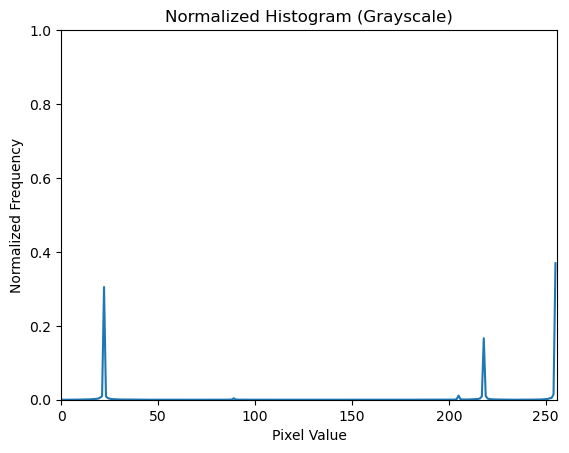

In [7]:
# Load a grayscale image
gray_image = cv2.imread('Data/fig5.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if gray_image is None:
    print("Error: Could not open or find the image.")
else:
    # Calculate the histogram
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Normalize the histogram
    normalized_histogram = histogram / np.sum(histogram)

    # Display the normalized histogram
    plt.plot(normalized_histogram)
    plt.title('Normalized Histogram (Grayscale)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 1])  # Adjust the y-axis limits as needed
    plt.show()

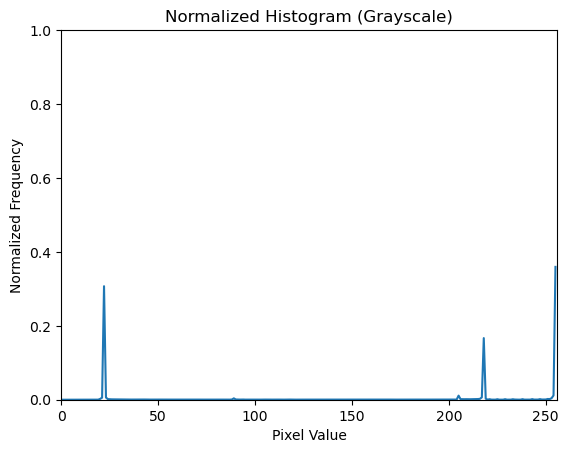

In [8]:
# Load a grayscale image
gray_image = cv2.imread('Data/fig5_blur.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if gray_image is None:
    print("Error: Could not open or find the image.")
else:
    # Calculate the histogram
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Normalize the histogram
    normalized_histogram = histogram / np.sum(histogram)

    # Display the normalized histogram
    plt.plot(normalized_histogram)
    plt.title('Normalized Histogram (Grayscale)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 1])  # Adjust the y-axis limits as needed
    plt.show()

### Question 4

In [16]:
def BarAreaCalculator(image):

    # Calculate the histogram of the grayscale image
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Display the grayscale image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # Display the histogram
    plt.subplot(1, 2, 2)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.plot(histogram)
    plt.xlim([0, 256])

    # Show the images and histogram
    plt.tight_layout()
    plt.show()

    # Flatten the histogram into a 1D array
    histogram = histogram.flatten()

        # Find the top 4 peaks in the histogram
    peaks, _ = find_peaks(histogram, distance=20)  # Adjust the distance threshold as needed

    # Sort the peak locations by peak height (frequency value)
    sorted_peak_indices = np.argsort(histogram[peaks])[::-1]

    # Ensure that there are at least 4 peaks
    if len(sorted_peak_indices) >= 4:
        top_4_peak_indices = sorted_peak_indices[:4]

        # Get the top 4 peak locations and frequencies
        top_4_peaks = peaks[top_4_peak_indices]
        top_4_peak_frequencies = histogram[top_4_peaks]

        # Print the top 4 peak locations and frequencies
        for i in range(4):
            print(f"Peak {i+1}: Location = {top_4_peaks[i]}, Frequency = {top_4_peak_frequencies[i]}")
    else:
        print("There are fewer than 4 peaks in the histogram.")

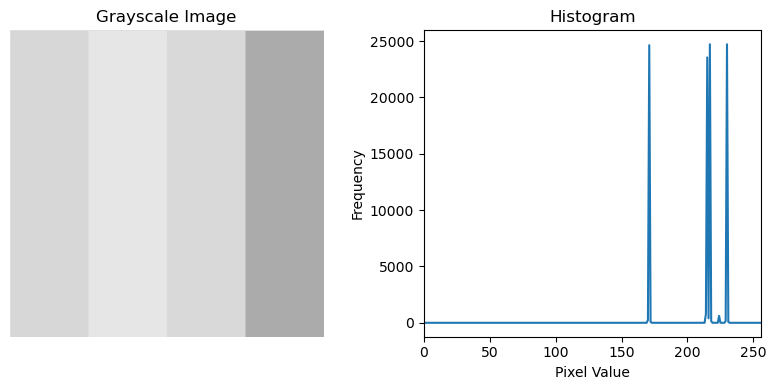

There are fewer than 4 peaks in the histogram.


In [17]:
# Load a color image
color_image = cv2.imread('Data/fig1.jpg')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not open or find the image.")
else:
    # Convert the color image to grayscale
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    
    BarAreaCalculator(grayscale_image)
    


In [6]:
height, width= grayscale_image.shape

print(f"Image width (columns): {width} pixels")
print(f"Image height (rows): {height} pixels")
#print(f"Number of channels: {channels}")

Image width (columns): 320 pixels
Image height (rows): 313 pixels


(0.0, 256.0)

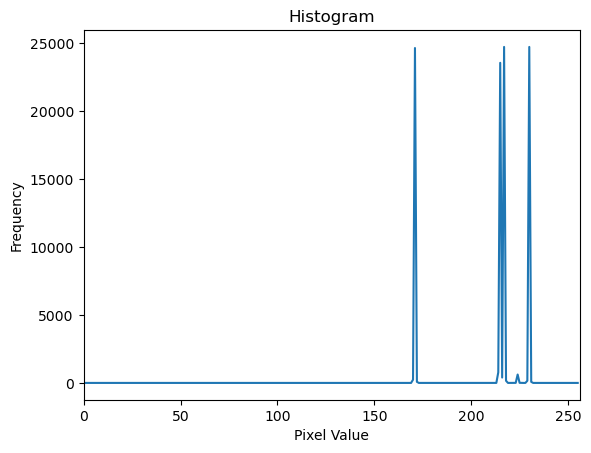

In [9]:
histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
# Plot the histogram
plt.figure()
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(histogram)
plt.xlim([0, 256])

In [ ]:
import pandas as pd
import numpy as np
 # Convert the histogram to a table (DataFrame)
pixel_values = np.arange(256)  # Pixel values from 0 to 255
frequency = histogram.flatten().astype(int)  # Flatten and convert to integers

# Create a DataFrame
df = pd.DataFrame({'Pixel Value': pixel_values, 'Frequency': frequency})

 # Temporarily set Pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display the table
print(df)

# Reset Pandas option to its default setting
pd.reset_option('display.max_rows')

In [10]:

# Read an image and perform edge detection and thresholding
image = grayscale_image
edges = cv2.Canny(image, threshold1=100, threshold2=200)
_, binary_image = cv2.threshold(edges, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display the image with contours
cv2.imshow('Image with Contours', image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


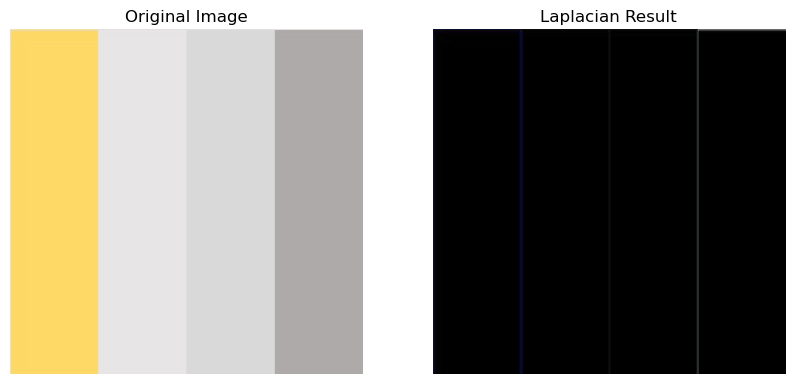

In [5]:
image = cv2.imread('Data/fig1.jpg')  # Load as color
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not open or find the image.")
else:
    # Apply the Laplacian operator
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Convert the Laplacian result to an unsigned 8-bit integer (0 to 255)
    laplacian_abs = np.uint8(np.absolute(laplacian))

    # Display the original image and the Laplacian result
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(laplacian_abs, cmap='gray')
    plt.title('Laplacian Result'), plt.axis('off')
    plt.show()

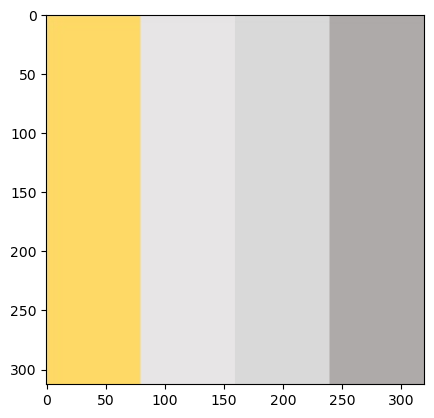

In [4]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

### Question 6

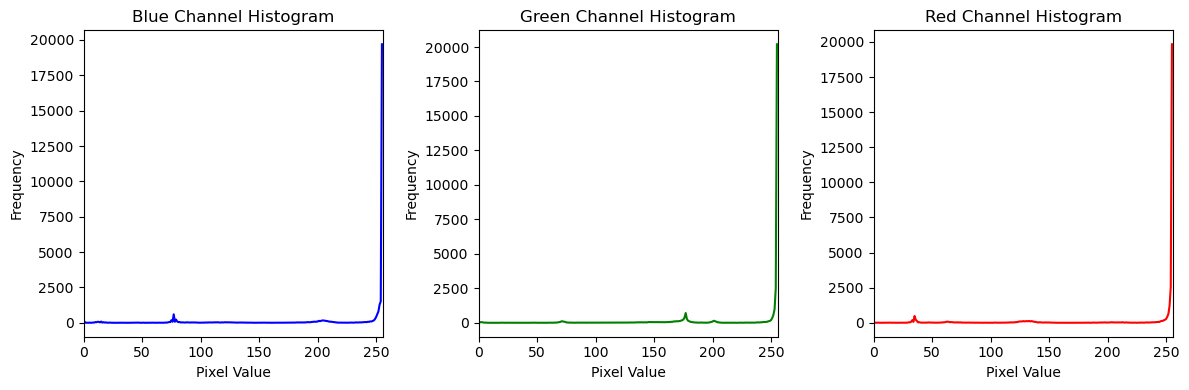

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a color image
color_image = cv2.imread('Data/finger-bones.jpg')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not open or find the image.")
else:
    blue_channel = color_image[:, :, 0]  # Blue channel is the first channel (0-indexed)
    green_channel = color_image[:, :, 1]  # Green channel is the second channel
    red_channel = color_image[:, :, 2]  # Red channel is the third channel

    # Calculate histograms for each channel
    blue_histogram = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
    green_histogram = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
    red_histogram = cv2.calcHist([red_channel], [0], None, [256], [0, 256])

    # Create subplots for each channel's histogram
    plt.figure(figsize=(12, 4))

    plt.subplot(131)  # Subplot for blue channel histogram
    plt.plot(blue_histogram, color='blue')
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.subplot(132)  # Subplot for green channel histogram
    plt.plot(green_histogram, color='green')
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.subplot(133)  # Subplot for red channel histogram
    plt.plot(red_histogram, color='red')
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

In [4]:
height, width,shape= color_image.shape

print(f"Image width (columns): {width} pixels")
print(f"Image height (rows): {height} pixels")

Image width (columns): 96 pixels
Image height (rows): 342 pixels


In [56]:
red_regions = [(0, 1), (0, 0)]
green_regions = [(0, 1), (0, 0)]
blue_regions = [(0, 1), (0, 0)]


# Initialize empty masks for each channel
red_mask = np.zeros(color_image.shape[:2], dtype=np.uint8)
green_mask = np.zeros(color_image.shape[:2], dtype=np.uint8)
blue_mask = np.zeros(color_image.shape[:2], dtype=np.uint8)

# Create masks for each intensity region
for region in red_regions:
    red_mask |= cv2.inRange(color_image, (region[0], 0, 0), (region[1], 255, 255))
for region in green_regions:
    green_mask |= cv2.inRange(color_image, (0, region[0], 0), (255, region[1], 255))
for region in blue_regions:
    blue_mask |= cv2.inRange(color_image, (0, 0, region[0]), (255, 255, region[1]))

# Combine masks for all channels
final_mask = cv2.bitwise_and(red_mask, cv2.bitwise_and(green_mask, blue_mask))

# Use the final mask to highlight the pixels within the specified regions
highlighted_image = cv2.bitwise_and(color_image, color_image, mask=final_mask)

# Display the original image and the highlighted image
cv2.imshow('Original Image', color_image)
cv2.imshow('Highlighted Image', highlighted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

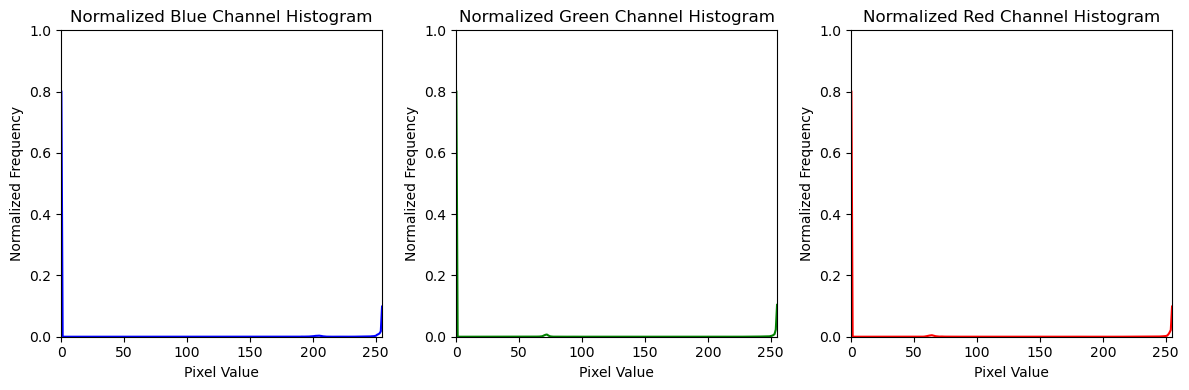

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a color image
color_image = cv2.imread('Data/Screenshot 2023-09-27 170828.png')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not open or find the image.")
else:
    blue_channel = color_image[:, :, 0]  # Blue channel is the first channel (0-indexed)
    green_channel = color_image[:, :, 1]  # Green channel is the second channel
    red_channel = color_image[:, :, 2]  # Red channel is the third channel


    # Calculate histograms for each channel
    blue_histogram = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
    green_histogram = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
    red_histogram = cv2.calcHist([red_channel], [0], None, [256], [0, 256])

    # Normalize the histograms
    blue_histogram /= blue_channel.size
    green_histogram /= green_channel.size
    red_histogram /= red_channel.size

    # Create subplots for each channel's histogram
    plt.figure(figsize=(12, 4))

    plt.subplot(131)  # Subplot for blue channel histogram
    plt.plot(blue_histogram, color='blue')
    plt.title('Normalized Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.xlim([0, 255])
    plt.ylim([0, 1])

    plt.subplot(132)  # Subplot for green channel histogram
    plt.plot(green_histogram, color='green')
    plt.title('Normalized Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.xlim([0, 255])
    plt.ylim([0, 1])

    plt.subplot(133)  # Subplot for red channel histogram
    plt.plot(red_histogram, color='red')
    plt.title('Normalized Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Normalized Frequency')
    plt.xlim([0, 255])
    plt.ylim([0, 1])

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
 # Convert the histogram to a table (DataFrame)
pixel_values = np.arange(256)  # Pixel values from 0 to 255
frequency = blue_histogram.flatten().astype(int)  # Flatten and convert to integers

# Create a DataFrame
df = pd.DataFrame({'Pixel Value': pixel_values, 'Frequency': frequency})

 # Temporarily set Pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display the table
print(df)

# Reset Pandas option to its default setting
pd.reset_option('display.max_rows')

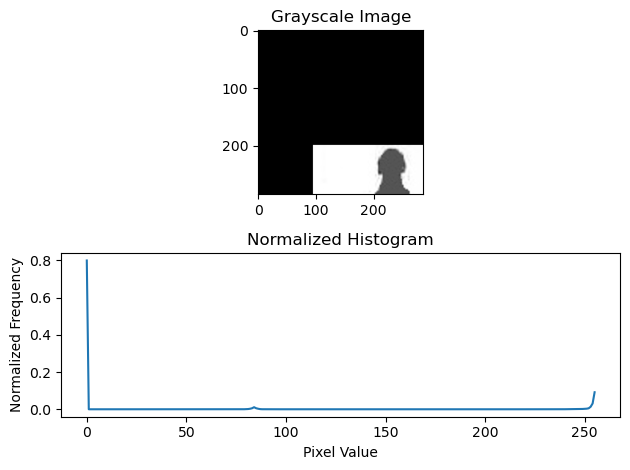

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the colored image
image = cv2.imread('Data/Screenshot 2023-09-27 170828.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the grayscale image
histogram = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Normalize the histogram to values between 0 and 1
histogram /= histogram.sum()

# Display the grayscale image
plt.subplot(2, 1, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')

# Display the normalized histogram
plt.subplot(2, 1, 2)
plt.plot(histogram)
plt.title('Normalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()


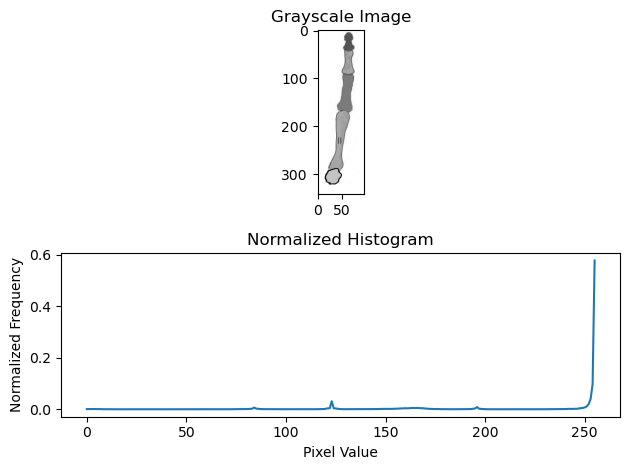

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the colored image
image = cv2.imread('Data/finger-bones.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the grayscale image
histogram = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Normalize the histogram to values between 0 and 1
histogram /= histogram.sum()

# Display the grayscale image
plt.subplot(2, 1, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')

# Display the normalized histogram
plt.subplot(2, 1, 2)
plt.plot(histogram)
plt.title('Normalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')

plt.tight_layout()
plt.show()
